In [131]:
import pandas as pd
import matplotlib.pyplot as plt

,Date,Close*
0,2019-03-26,59.94
1,2019-03-27,59.41
2,2019-03-28,59.30
3,2019-03-29,60.14
4,2019-04-01,61.59
...,...,...
1256,2024-03-19,83.47
1257,2024-03-20,81.68
1258,2024-03-21,81.07
1259,2024-03-22,80.63


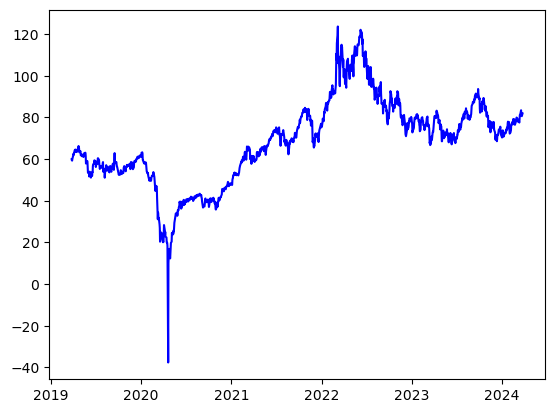

In [132]:
#import WTI futures data 
dfWTI = pd.read_excel('Crude_Oil_May_24.xlsx') 
dfWTI = dfWTI[['Date', 'Close*']]
dfWTI['Date'] = pd.to_datetime(dfWTI['Date']) #ensure type for data is set to datetime
dfWTI['Date'] = pd.to_datetime(dfWTI['Date']).dt.date # drops time next to the date 
dfWTI1 = dfWTI.sort_values(by='Date', ascending=True)
dfWTI1 = dfWTI1.reset_index(drop=True)
dfWTI1['Date'] = pd.to_datetime(dfWTI1['Date']) #ensure type for new data is set to datetime
plt.plot(dfWTI1['Date'], dfWTI1['Close*'], label='Close Price', color='blue')  # Plot Date against Close*
dfWTI1

In [133]:
import pandas as pd

#import Kerosene spot 

dfKer = pd.read_csv('Kerosene_spot.csv')
dfKer.columns = ['Date', 'Kerosene spot']

# Display a few original dates to see the differing formats
print("Original date formats:")
print(dfKer['Date'].head(10))

# make sure all dates are in the same format as futures Data frame ie YYYY-MM-DD
dfKer['Date'] = pd.to_datetime(dfKer['Date'], format='mixed', errors='coerce')
dfKer1 = dfKer.sort_values(by='Date', ascending=True) #make ascending order 
dfKer1 = dfKer1.reset_index(drop=True) 
dfKer1

Original date formats:
0    03/25/2024
1    03/22/2024
2    03/21/2024
3    03/20/2024
4    03/19/2024
5    03/18/2024
6    03/15/2024
7    03/14/2024
8    03/13/2024
9       3/12/24
Name: Date, dtype: object


,Date,Kerosene spot
0,1990-04-02,0.55
1,1990-04-03,0.56
2,1990-04-04,0.56
3,1990-04-05,0.54
4,1990-04-06,0.54
...,...,...
8533,2024-03-19,2.67
8534,2024-03-20,2.61
8535,2024-03-21,2.61
8536,2024-03-22,2.58


In [134]:
# Check if any dates couldn't be converted in dfKer (will show as NaT) - answer is no, so can proceed 
null_dates = dfKer['Date'].isnull().sum()
null_dates

0

In [135]:
# filter so that the time horizons are the same when looking at st dev and corr 
dfKer2 = dfKer1[dfKer1['Date'] >= '2019-03-26']
dfKer2 = dfKer2.reset_index(drop=True)

# Find dates in dfKer2 that are not in dfWTI1 - shows we have 10 dates missing 
missing_dates_in_dfKer2 = dfWTI1.loc[~dfWTI1['Date'].isin(dfKer2['Date'])]
missing_dates_in_dfKer2


,Date,Close*
70,2019-07-05,57.51
160,2019-11-11,56.86
173,2019-11-29,55.17
424,2020-11-27,45.53
675,2021-11-26,68.15
893,2022-10-10,91.13
917,2022-11-11,88.96
1143,2023-10-09,86.38
1176,2023-11-23,76.35
1235,2024-02-19,79.29


In [136]:
# merge the two data frames and ensure that the 10 kerosene spot dates above are dropped when merging 

merged_df = dfWTI1.merge(dfKer2, on='Date', how='inner') # only includes the rows that exist in both DataFrames (i.e., the rows with matching 'Date' values in both DataFrames) 
merged_df

,Date,Close*,Kerosene spot
0,2019-03-26,59.94,1.92
1,2019-03-27,59.41,1.90
2,2019-03-28,59.30,1.90
3,2019-03-29,60.14,1.90
4,2019-04-01,61.59,1.92
...,...,...,...
1246,2024-03-19,83.47,2.67
1247,2024-03-20,81.68,2.61
1248,2024-03-21,81.07,2.61
1249,2024-03-22,80.63,2.58


In [137]:
# now we have to work out changes in both spot and futures price
merged_df1 = merged_df.copy()  # Create a copy

# to measure the changes in futures/price, we will use pct change (returns) for both assets
# this is so that we can have a relative source of comparison between the two assets in order to calculate p and stdev 

merged_df1.loc[:, 'Futures_pct_change'] = merged_df1['Close*'].pct_change() 
merged_df1.loc[:, 'Spot_pct_change'] = merged_df1['Kerosene spot'].pct_change()

merged_df1['Date'] = pd.to_datetime(merged_df1['Date']) #ensure type for new data is set to datetime

In [138]:
# Create a new DataFrame to store these changes
changes_merged = merged_df1[['Date', 'Futures_pct_change', 'Spot_pct_change']]
changes_merged = changes_merged.iloc[1:].reset_index(drop=True)
changes_merged['Date'] = pd.to_datetime(changes_merged['Date']) #ensure type for new data is set to datetime
pd.set_option('display.float_format', '{:.6f}'.format)  # Show up to 6 decimal places
changes_merged

,Date,Futures_pct_change,Spot_pct_change
0,2019-03-27,-0.008842,-0.006266
1,2019-03-28,-0.001852,-0.003153
2,2019-03-29,0.014165,-0.000527
3,2019-04-01,0.024110,0.010549
4,2019-04-02,0.016074,0.008351
...,...,...,...
1245,2024-03-19,0.009067,-0.017292
1246,2024-03-20,-0.021445,-0.024335
1247,2024-03-21,-0.007468,0.000767
1248,2024-03-22,-0.005427,-0.009969


In [139]:
#now, in evaluating the most appropriate historical time horizon, we need to first workout how many data points exist between the date of trade inception (15nov23) vs. hedge date (19mar24)
#after finding this observation, we then go backward the amount of data points from the trade inception date as this is the most appropriate horizon to measure st dev and corr
# (as the historical time exactly matches the time between futures trade and hedge date)

start_date = pd.to_datetime('2023-11-15')
end_date = pd.to_datetime('2024-03-19')

filtered_df = changes_merged[(changes_merged['Date'] >= start_date) & (changes_merged['Date'] <= end_date)] # truncate data 

# Get the number of data points (rows) in the filtered DataFrame
num_data_points = len(filtered_df)

# Print the result
print(f"Number of data points between {start_date} and {end_date}: {num_data_points}")

# given index for 15nov23 is 1161, we need to go back 85 historical observations from 15nov24. 
print(1161-85+1)

Number of data points between 2023-11-15 00:00:00 and 2024-03-19 00:00:00: 85
1077


In [140]:
# answer is from index 1077-1161 (inclusive).DATA POINTS ARE FROM 18JUL23-15NOV23 INCLUSIVE. use this to calculate st dev and correlations
df1a = changes_merged.iloc[1077:1162] #1162 given python omits this last one. 
df1a

,Date,Futures_pct_change,Spot_pct_change
1077,2023-07-18,0.021578,0.012170
1078,2023-07-19,-0.005281,0.014925
1079,2023-07-20,0.003716,0.013480
1080,2023-07-21,0.019040,0.029021
1081,2023-07-24,0.021669,0.013709
...,...,...,...
1157,2023-11-09,0.005443,-0.021659
1158,2023-11-10,0.018880,0.001501
1159,2023-11-13,0.014125,0.044961
1160,2023-11-14,0.000000,0.026174


In [141]:
#Q1a) we need to solve for minimum variance hedge ratio first to find optimal number of contracts 
# h* = p * stdev(kerosene) / stdev(WTI futures) 

p = df1a['Futures_pct_change'].corr(changes_merged['Spot_pct_change'])
stdevK = df1a['Spot_pct_change'].std()
stdevF = df1a['Futures_pct_change'].std()

print(f'Correlation b/w spot and futures: {p:.2f}')
print(f'St Dev of Kerosene spot: {stdevK:.2f}')
print(f'St Dev of WTI Futures: {stdevF:.2f}')

h = (p*stdevK)/stdevF
print(f'Optimal Hedge Ratio: {h:.4f}')

Correlation b/w spot and futures: 0.54
St Dev of Kerosene spot: 0.03
St Dev of WTI Futures: 0.02
Optimal Hedge Ratio: 0.8139


In [142]:
# then N = h*Qs/Qf 
# want to buy 2,000,000 gallons 
# 1 contract is 1000 barrels as given in the question, and we know h 

Qf = 1000*merged_df.iloc[1162,1]  #USD exposure of futures (multiply by futures price on 15nov23)
Qs = 2000000*merged_df.iloc[1162,2] # USD exposure value of spot (multiply by spot price on 15nov)

N = (h*Qs)/Qf 
print(f'Exact Number of Futures Contracts: {N}')
# given that you cant buy .9 of a contract, and is always most beneficial to be over vs. underhedged (ie best to get >100% hedging exposure vs. < 100%), we will buy 60 contracts
print(f'Optimal Number of Futures Contracts to purchase (Optimal Hedge): {round(N) }')


Exact Number of Futures Contracts: 59.98755347485184
Optimal Number of Futures Contracts to purchase (Optimal Hedge): 60


In [143]:
#q1b) net price paid = spot price * amount - profit from futures*futures contracts *futures size per contract

# Access just the Kerosene spot value (if exists)
spot19mar24 = dfKer2[dfKer2['Date'] == '2024-03-19']['Kerosene spot'].iloc[0]
print(spot19mar24)

#change in futures
futureschange = dfWTI1[dfWTI1['Date'] == '2024-03-19']['Close*'].iloc[0]-dfWTI1[dfWTI1['Date'] == '2023-11-15']['Close*'].iloc[0]
print(round(futureschange,2))
netprice = spot19mar24*2000000 - futureschange*round(N)*1000 
print(f'Net price that company pays: ${netprice:.2f}')


2.671
6.81
Net price that company pays: $4933400.00


Q1c) The outcome of the hedge is that the net price paid is lower with the hedge as the futures price rose in value (i.e. gain in futures partially offset the total price paid). So the hedge is successful in reducing total cost for the company. 
Yes, basis would exist because a) the company is not perfectly hedging the spot asset (kerosene jet fuel ≠ wti futures) and b) a maturity mismatch exists (WTI contract is for May24 but the company wants to purchase kerosene in Mar24). 



In [144]:
#q2a) 

#first of all import the spot WTI 

dfWTIspot = pd.read_csv('Cushing_OK_WTI_Spot_Price_FOB.csv')
dfWTIspot.columns = ['Date', 'WTI spot']
dfWTIspot['Date'] = pd.to_datetime(dfWTIspot['Date'], format='mixed', errors='coerce')
dfWTIspot = dfWTIspot.sort_values(by='Date', ascending=True)
dfWTIspot = dfWTIspot.reset_index(drop=True)
dfWTIspot

,Date,WTI spot
0,1986-01-02,25.560000
1,1986-01-03,26.000000
2,1986-01-06,26.530000
3,1986-01-07,25.850000
4,1986-01-08,25.870000
...,...,...
9624,2024-03-19,84.390000
9625,2024-03-20,82.790000
9626,2024-03-21,81.990000
9627,2024-03-22,81.100000


In [145]:
forwardprice = 78 
amount = 1000000
WTI8dec23 = dfWTIspot[dfWTIspot['Date'] == '2023-12-08']['WTI spot'].iloc[0]
WTI8dec23

# hedge fund has gone long forward, and given forward price > spot, they will enter a loss for the forward
pnlforward = (WTI8dec23 - forwardprice)*amount
print(f'PNL from Forward: -${abs(pnlforward):,.2f}')


PNL from Forward: -$7,130,000.00


In [146]:
# now from future, he goes short 1000 contracts on 12 jan 22  
futureprice12jan22 = dfWTI1[dfWTI1['Date'] == '2022-01-12']['Close*'].iloc[0]
print(futureprice12jan22)

# then closes this out on 8 dec 23 
futureprice8dec23 = dfWTI1[dfWTI1['Date'] == '2023-12-08']['Close*'].iloc[0]
print(futureprice8dec23)


82.64
71.23


In [147]:
pnlfuture = (futureprice12jan22-futureprice8dec23)*1000*1000
print(f'PNL from Future: ${pnlfuture:.2f}')


PNL from Future: $11410000.00


In [97]:
total_PNL = pnlforward+pnlfuture
print(f'Total PNL from forward and futures: ${total_PNL:.2f}')


Total PNL from forward and futures: $4280000.00


In [148]:
#q2b) first filter for the appropriate date ranges 

start = pd.to_datetime('2022-01-12')
end = pd.to_datetime('2023-12-08') # 08dec23 - last futures trade is on the 8th dec23 to coincide with close out of forward.

df2b = dfWTI1[(dfWTI1['Date'] >= '2022-01-12') & (dfWTI1['Date'] <= '2023-12-08')] 
df2b = df2b.reset_index(drop=True)

margincashdf = df2b.copy()
pd.set_option('display.float_format', '{:.2f}'.format)  # Show up to 2 decimal places
margincashdf

,Date,Close*
0,2022-01-12,82.64
1,2022-01-13,82.12
2,2022-01-14,83.82
3,2022-01-18,85.43
4,2022-01-19,86.96
...,...,...
476,2023-12-04,73.04
477,2023-12-05,72.32
478,2023-12-06,69.38
479,2023-12-07,69.34


In [149]:
# parameters for the function 
NUM_CONTRACTS = 1000
CONTRACT_SIZE = 1000  # 1000 barrels per contract
INITIAL_MARGIN_TOTAL = 6000 * NUM_CONTRACTS  # $6M
MAINTENANCE_MARGIN_TOTAL = INITIAL_MARGIN_TOTAL  # $6M
TOTAL_CAPITAL = 18_000_000
CASH_INTEREST_RATE = 0.04  # 4% continuous compounding
MARGIN_INTEREST_RATE = 0.03  # 3% daily compounding

# Key assumptions:
a) interest is compounded daily however in some instances (weekends, public holiday) the jump between dates is not 1 so you have to account for this by accumulating interest based on the difference in days. Days in year is 365

b) this daily interest occurs before the PNL is added to the respective account (margin or cash) i.e. only once the interest has been calculated is the absolute PNL used to determine the size of the margin call

c) Any time that the margin account returns a value > 6000000, transfer the excess to the cash account as this earns a higher rate of interest 

d) last full day of earning interest is 8th dec 2023, and total capital is recorded at the end of 8 dec 2023 after interest. i.e. take the value on the 8th Dec 2023 and report it as 9 Dec 2023 (no interest between these days) 

The flow of the below is summarised for entry i: 
1) earn interest on i-1 margin account 
2) add PNL to margin account 
3) if margin account > 6000000, transfer excess (int + pnl) to cash account
4) if margin account < 6000000, determine size of shortfall and store this as margin call value (funded by cash account) 
5) cash account earns interest on i-1 cash account + excess - margin call 

In [150]:
import numpy as np

def track_margin_and_capital_to_dec8(df):
    # Initial setup
    cash_account = TOTAL_CAPITAL - INITIAL_MARGIN_TOTAL  # $12M on Jan 12, no interest yet
    margin_account = INITIAL_MARGIN_TOTAL  # $6M
    
    # Storage for results
    margin_balances = []
    cash_balances = []
    margin_calls = []
    excess_transfers = []
    margin_call_values = []
    total_capitals = []

    # make sure type is set to date
    df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
    
    # Calculate day differences. this is because interest is compounded daily however in some instances (weekends, public holiday) the jump between dates is not 1 so you have to account for this by accumulating interest based on the difference in days 
    df.loc[:, 'Days_Diff'] = df['Date'].diff().dt.days
    
    # Calculate daily PnL (short position: price drop = gain, price rise = loss)
    df.loc[:, 'Price_Change'] = df['Close*'].shift(1) - df['Close*']
    df.loc[:, 'Daily_PnL'] = df['Price_Change'] * NUM_CONTRACTS * CONTRACT_SIZE  # Adjusted for 1000 contracts and 1000 barrels per contract
    
    # Iterate over each day in the dataset
    for index, row in df.iterrows():
        date = row['Date']
        
        # Previous balances (day i-1)
        prev_margin = margin_account if index == 0 else margin_balances[-1]
        prev_cash = cash_account if index == 0 else cash_balances[-1]
        
        # Number of days since last date (0 for first row, as no interest yet)
        days = 0 if index == 0 else row['Days_Diff']
        
        # 1) Margin account interest on i-1 balance (starts Jan 13)
        margin_interest = prev_margin * ((1 + MARGIN_INTEREST_RATE / 365) ** days - 1) if index > 0 else 0
        margin_with_interest = prev_margin + margin_interest
        
        # 2) Add PnL to margin account (after interest)
        pnl = row['Daily_PnL'] if not pd.isna(row['Daily_PnL']) else 0
        margin_with_pnl = margin_with_interest + pnl
        
        # 3) Check for excess over $6M (transfer PnL + interest)
        excess_to_cash = 0
        if margin_with_pnl > INITIAL_MARGIN_TOTAL:
            excess_to_cash = margin_with_pnl - INITIAL_MARGIN_TOTAL  # Entire excess (PnL + interest)
            margin_account = INITIAL_MARGIN_TOTAL  # Reset to $6M
            excess_transfers.append((date, excess_to_cash))
        else:
            margin_account = margin_with_pnl
        
        # 4) Check for shortfall/margin call
        margin_call_amount = 0
        if margin_account < INITIAL_MARGIN_TOTAL:
            margin_call_amount = INITIAL_MARGIN_TOTAL - margin_account
            margin_account = INITIAL_MARGIN_TOTAL  # Restored to $6M
            margin_calls.append((date, margin_call_amount))
        
        # 5) Cash account interest on i-1 balance + excess - margin call
        if index == 0:
            cash_account = prev_cash + excess_to_cash - margin_call_amount  # No interest on first day
        else:
            cash_interest = prev_cash * np.exp((CASH_INTEREST_RATE * days) / 365)
            cash_account = cash_interest + excess_to_cash - margin_call_amount
        
        # Calculate total capital for the day
        total_capital = cash_account + margin_account
        
        # Store balances and new columns
        margin_balances.append(margin_account)
        cash_balances.append(cash_account)
        margin_call_values.append(margin_call_amount)
        total_capitals.append(total_capital)
    
    # Add results to DataFrame using .loc
    df.loc[:, 'Margin_Balance'] = margin_balances
    df.loc[:, 'Margin_Call'] = margin_call_values
    df.loc[:, 'Cash_Balance'] = cash_balances
    df.loc[:, 'Total_Capital'] = total_capitals
    
    # Extract Dec 8 values from the last row
    final_cash_dec8 = cash_balances[-1]
    final_margin_dec8 = margin_balances[-1]
    total_capital_dec8 = total_capitals[-1]
    
    return {
        'df_with_balances': df,
        'margin_calls': margin_calls,
        'excess_transfers': excess_transfers,
        'total_capital_dec8': total_capital_dec8,
        'final_cash_dec8': final_cash_dec8,
        'final_margin_dec8': final_margin_dec8
    }

# Run the function
result = track_margin_and_capital_to_dec8(margincashdf)
pd.set_option('display.float_format', '{:,.2f}'.format)

# Clean up and reorder columns
margincashdf.drop(columns=['Price_Change'], inplace=True)
margincashdf = margincashdf[['Date', 'Days_Diff','Close*', 'Daily_PnL', 'Margin_Balance', 'Margin_Call', 'Cash_Balance', 'Total_Capital']]
margincashdf.loc[:, 'Date'] = pd.to_datetime(margincashdf['Date'])
pd.reset_option('display.max_rows', None)
margincashdf

# tracking margin account balance below

,Date,Days_Diff,Close*,Daily_PnL,Margin_Balance,Margin_Call,Cash_Balance,Total_Capital
0,2022-01-12,NaN,82.64,NaN,6000000,0.00,"12,000,000.00","18,000,000.00"
1,2022-01-13,1.00,82.12,"520,000.00",6000000,0.00,"12,521,808.29","18,521,808.29"
2,2022-01-14,1.00,83.82,"-1,700,000.00",6000000,"1,699,506.85","10,823,673.77","16,823,673.77"
3,2022-01-18,4.00,85.43,"-1,610,000.00",6000000,"1,608,027.15","9,220,392.28","15,220,392.28"
4,2022-01-19,1.00,86.96,"-1,530,000.00",6000000,"1,529,506.85","7,691,895.94","13,691,895.94"
...,...,...,...,...,...,...,...,...
476,2023-12-04,3.00,73.04,"1,030,000.00",6000000,0.00,"22,564,511.45","28,564,511.45"
477,2023-12-05,1.00,72.32,"720,000.00",6000000,0.00,"23,287,477.55","29,287,477.55"
478,2023-12-06,1.00,69.38,"2,940,000.00",6000000,0.00,"26,230,522.90","32,230,522.90"
479,2023-12-07,1.00,69.34,"40,000.00",6000000,0.00,"26,273,890.78","32,273,890.78"


In [151]:
# need to check whether cash balance goes negative at any stage throughout the life of the trade
# this would mean that the hedge fund cannot meet its margin call 

negative_cash_rows = margincashdf[margincashdf['Cash_Balance'] < 0]
negative_cash_rows

# we can see the first instance of the cash bal < 0 occurs on the 2022 feb 14. 
# this means that on this date, the hedge fund cannot meet its margin call and 
# the futures exchange closes down the futures position, returning the initial margin (6m) to the hedge fund. 
# they also have their balance in the cash account earning interest

,Date,Days_Diff,Close*,Daily_PnL,Margin_Balance,Margin_Call,Cash_Balance,Total_Capital
22,2022-02-14,3.00,95.46,"-2,360,000.00",6000000,"2,358,520.43","-778,027.91","5,221,972.09"
31,2022-02-28,3.00,95.72,"-4,130,000.00",6000000,"4,128,520.43","-1,027,139.57","4,972,860.43"
32,2022-03-01,1.00,103.41,"-7,690,000.00",6000000,"7,689,506.85","-8,716,758.99","-2,716,758.99"
33,2022-03-02,1.00,110.60,"-7,190,000.00",6000000,"7,189,506.85","-15,907,221.15","-9,907,221.15"
34,2022-03-03,1.00,107.67,"2,930,000.00",6000000,0.00,"-12,978,471.36","-6,978,471.36"
...,...,...,...,...,...,...,...,...
134,2022-07-27,1.00,97.26,"-2,280,000.00",6000000,"2,279,506.85","-2,699,876.17","3,300,123.83"
135,2022-07-28,1.00,96.42,"840,000.00",6000000,0.00,"-1,859,678.91","4,140,321.09"
136,2022-07-29,1.00,98.62,"-2,200,000.00",6000000,"2,199,506.85","-4,059,389.57","1,940,610.43"
154,2022-08-24,1.00,94.89,"-1,150,000.00",6000000,"1,149,506.85","-308,482.52","5,691,517.48"


In [152]:
# MARGIN CALL DATES

# so the margin call dates will be from initiation of trade all the way up to the 14feb22 where the position is closed. 

margincalldays = margincashdf[margincashdf['Margin_Call'] > 0]
margincalldays = margincalldays[['Date','Margin_Call']]
margincalldays = margincalldays[margincalldays['Date'] <= '2022-02-14']
margincalldays

,Date,Margin_Call
2,2022-01-14,"1,699,506.85"
3,2022-01-18,"1,608,027.15"
4,2022-01-19,"1,529,506.85"
8,2022-01-25,"2,289,506.85"
9,2022-01-26,"1,749,506.85"
11,2022-01-28,"209,506.85"
12,2022-01-31,"1,328,520.43"
13,2022-02-01,"49,506.85"
14,2022-02-02,"59,506.85"
15,2022-02-03,"2,009,506.85"


In [153]:
# TOTAL CAPITAL  
# so on the 14feb22 when the futures exchange closes down the position, the hedge fund gets 
#their initial/maintenance margin of 6000000 
# they also get the cash balance from the previous date (11Feb22) * 3 days of interest to the 14feb22 

import numpy as np
print(INITIAL_MARGIN_TOTAL)
cashbal14feb22 = margincashdf.iloc[21, 6] * np.exp(0.04 * 3 / 365) # margincashdf.iloc[21, 6] gets cash balance on 11feb22
print(round(cashbal14feb22,2))
balance = INITIAL_MARGIN_TOTAL + cashbal14feb22
print(f'Total Bal on 14Feb22: ${balance:.2f}')

# this balance then earns interest all the way to 8dec23 (as laid out in the assumptions). work out days between 14feb22 and 8dec23 for interest calculation

date1 = pd.to_datetime("2022-02-14")
date2 = pd.to_datetime("2023-12-08")

days_between = (date2 - date1).days

totalcapital =  balance * np.exp(0.04 * days_between/365) + pnlforward #have to add the pnl from the cash settled forward as this position is closed out on 8 dec 2023
print(f'Total Capital on 9Dec23: ${totalcapital:.2f}')

6000000
1580492.52
Total Bal on 14Feb22: $7580492.52
Total Capital on 9Dec23: $1020881.81


In [154]:
#2c) 
# forwards do not require posting margin so don't have to consider margin account here. the hedge fund's total capital would just be the 18m in the cash account + pnl from cash forward: 

x = pd.to_datetime("2022-01-12")
y = pd.to_datetime("2023-12-08")
daydiff = (y - x).days
daydiff

totalfromfwdonly = 18000000 * np.exp(0.04 * daydiff/365) + pnlforward
print(f'Total Capital from Forward Only on 9Dec23 (no hedge): ${totalfromfwdonly:.2f}')

Total Capital from Forward Only on 9Dec23 (no hedge): $12294519.14


#2d 
When we ignore the futures margin transactions - not accounting for the margin transactions across the life of the futures trade - part a) gives us a theoretical value of how much the combination of forward + future would be on the 8 December 2023 (also ignores interest). This suggests that a) would be most optimal out of all 3 trade scenarios however it is the least realistic. This would not be a very practical or real life calculation as you need to consider the margin calls throughout the life of the trade which eventually cannot be met on 14Feb22, causing the futures exchange to close down the position, which means that they cannot realise the theoretical futures gain on 8Dec2023. Also ignoring the interest calculation is naive and should be included. 

b) The final balance of $1.02m in part b) is the most real life example of the hedge fund's total capital, as it accounts for both the margin requirement which all futures trades need (as well as cash balances) and interest earned in both accounts. It is unfortunate the hedge fund fails to meet the margin call on 14Feb22 from the negative cash balance and has to cease trading futures. When considering this outcome out of all 3 scenarios, this has the largest negative impact to the hedge fund's overall capital, but it is the most real life/practical calculation.

c) Just considering the forward example provides the figure for 18m balance + interest as well as the PNL from forward. This is relatively realistic as well given that the forward is cash settled at the unwind date, however it is quite unlikely that interest rates remain constant at 4% for the entire life of the trade (unless the 4% was locked in/preagreed with bank at trade inception e.g. if they received fixed on this balance which was then continuously compounded). But I believe the more likely scenario would be that interest rates fluctuate with market data over the life of the trade. I would rank this 2nd out of the 3 scenarios in terms of real-life practicality. 

In summary, what I have learnt from this exercise is that it is imperative to consider the margin/interest calculations when looking at trading futures as the margin calls have a substantial impact on:
- whether the exchange eventually closes out your position
- the cash balance of the hedge fund
- their eventual total capital.

Futures are also very leveraged products as you don't need to outlay a large amount of money to hold a large position, and when the market moves, this magnifies both gains and losses!  
